In [18]:
import torch
import pandas as pd 
from spender.data.sdss import BOSS
import matplotlib.pyplot as plt
#import smplotlib
import os 
import numpy as np
from astropy.io import fits 

github = "pmelchior/spender"
sdss, model = torch.hub.load(github, 'sdss_II', map_location=torch.device('cpu'))

plates = []
mjds = []
fiberids = []

waves = []
fluxes = []

dir = '/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/data/sdss-qso-catalogue/spectra'
for sub_dir in os.listdir(dir)[0:10]: 
    if '.' not in sub_dir:
        sub_dir = os.path.join(dir, sub_dir)
        for file in os.listdir(sub_dir): 
            if '.1' not in file: 
                file_list = file.split('-')
                plates.append(int(file_list[1]))
                mjds.append(int(file_list[2]))
                fiberids.append(int(file_list[3].split('.')[0]))

                hdul = fits.open(os.path.join(sub_dir, file))

                for i in hdul[1].header.values():
                    waves.append(10**hdul[1].data['loglam'])
                    fluxes.append(hdul[1].data['model']) # flux is raw, model is smoothed

n_obs = 20

waves = np.array(waves[0:n_obs])
fluxes = np.array(fluxes[0:n_obs])
fluxes = fluxes/np.max(fluxes)

ids = list((plates[i], mjds[i], fiberids[i]) for i in range(n_obs))

spec, w, z, norm, zerr = BOSS.make_batch(dir, ids)

with torch.no_grad():
    s, spec_rest, spec_reco = model._forward(spec, instrument=sdss, z=z)

spec = spec.numpy()
mask = ~np.isnan(spec).any(axis=1)

spec = spec[mask]
w = w[mask]

wave_obs = model.wave_obs.numpy() 
spec_reco = spec_reco.numpy()[mask]

Using cache found in /Users/yaroslav/.cache/torch/hub/pmelchior_spender_main


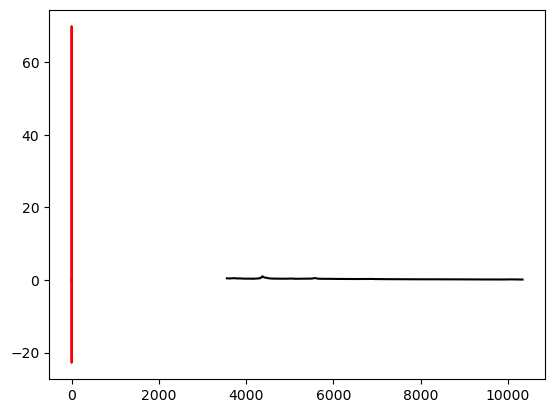

In [23]:
plt.plot(waves[2], fluxes[2], color='black')
plt.plot(w[2], spec[2], color='red')

In [24]:
w

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])